In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#设置绘图时显示的中文字体
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
power_info=pd.read_csv('td01.csv')
power_info

,数据时间,总有功功率（kw）
0,2018/1/1 0:00,244033.7682
1,2018/1/1 0:15,232720.6402
2,2018/1/1 0:30,231685.6891
3,2018/1/1 0:45,227581.3317
4,2018/1/1 1:00,233482.4269
...,...,...
128151,2021/8/31 22:45,202409.1270
128152,2021/8/31 23:00,218576.4635
128153,2021/8/31 23:15,200112.5091
128154,2021/8/31 23:30,199865.5937


In [2]:
std_rng=pd.date_range(start='2018/1/1 0:00',end='2021/8/31 23:45',freq='15min')
print(len(std_rng))
print(len(power_info))#检查时间序列是否完整

128544
128156


In [3]:
power_info = power_info.set_index(pd.to_datetime(power_info['数据时间'])).drop('数据时间',axis=1)
power_info = power_info.resample('D').mean().interpolate()
print(len(power_info))

128544


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei


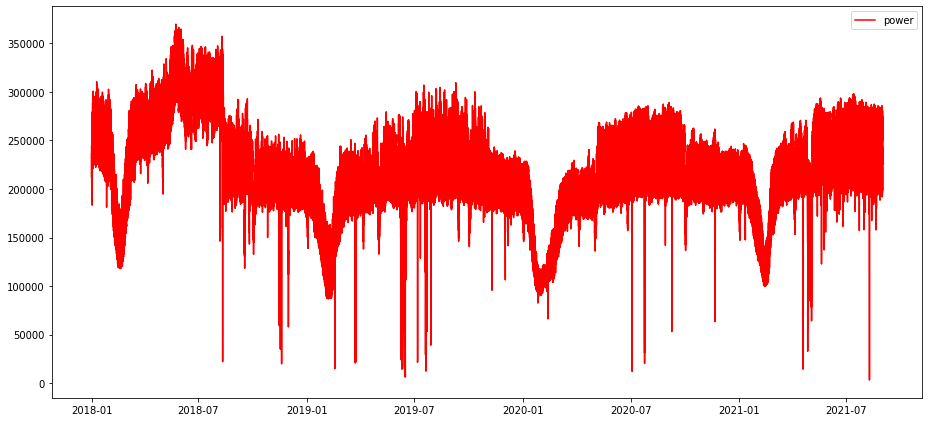

In [4]:
#预览数据
fig=plt.figure(figsize=(15.6,7.2))
ax=fig.add_subplot(111)
line=ax.plot(power_info.index,power_info['总有功功率（kw）'],\
             'r-',label='power')
plt.legend()

In [5]:
#使用拉格朗日插值函数对异常值插值
from scipy.interpolate import lagrange#导入插值函数
def inmsg(s,label_index,k=5):
    sc=s.copy()
    #获取标签索引位置
    loc=sc.index.get_loc(label_index)
    stmp=sc[loc-k:loc+k+1]
    #生成插值序列
    x=list(range(0,k))+list(range(k+1,2*k+1))
    stmp=list(stmp[0:k])+list(stmp[k+1:2*k+1])
    #插值
    ret=lagrange(x,stmp)(k)
    #将插值结果赋回原序列
    sc[label_index]=ret
    return sc

In [6]:
#使用inmsg()对负荷小于10000的异常点进行插值
intrp_label=power_info['总有功功率（kw）'][power_info['总有功功率（kw）']<10000].index
for label_index in intrp_label:
    power_info['总有功功率（kw）']=inmsg(power_info['总有功功率（kw）'],label_index,3)

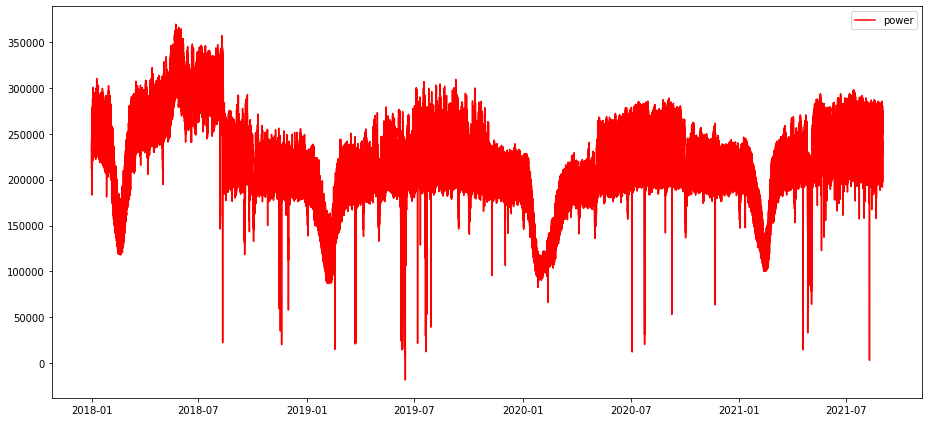

In [7]:
#预览数据
fig=plt.figure(figsize=(15.6,7.2))
ax=fig.add_subplot(111)
line=ax.plot(power_info.index,power_info['总有功功率（kw）'],\
             'r-',label='power')
plt.legend()

In [8]:
#输出数据
column=['数据时间','总有功功率（kw）']
td01_new=pd.DataFrame(columns=column,data=power_info)
td01_new.to_csv('td01_new.csv')

In [9]:
power_info

,总有功功率（kw）
数据时间,
2018-01-01 00:00:00,244033.7682
2018-01-01 00:15:00,232720.6402
2018-01-01 00:30:00,231685.6891
2018-01-01 00:45:00,227581.3317
2018-01-01 01:00:00,233482.4269
...,...
2021-08-31 22:45:00,202409.1270
2021-08-31 23:00:00,218576.4635
2021-08-31 23:15:00,200112.5091
